In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import grid2op
from grid2op.PlotGrid import PlotMatplot
from lightsim2grid import LightSimBackend

c:\Users\Ernest\.conda\envs\l2rpn-test\lib\site-packages\grid2op\Backend\pandaPowerBackend.py:32: UserWarning: Numba cannot be loaded. You will gain possibly massive speed if installing it by 
	c:\Users\Ernest\.conda\envs\l2rpn-test\python.exe -m pip install numba

  warnings.warn(


In [2]:
env_name = "rte_case5_example"  # or any other name.
env = grid2op.make(env_name, test=True)

c:\Users\Ernest\.conda\envs\l2rpn-test\lib\site-packages\grid2op\MakeEnv\Make.py:438: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


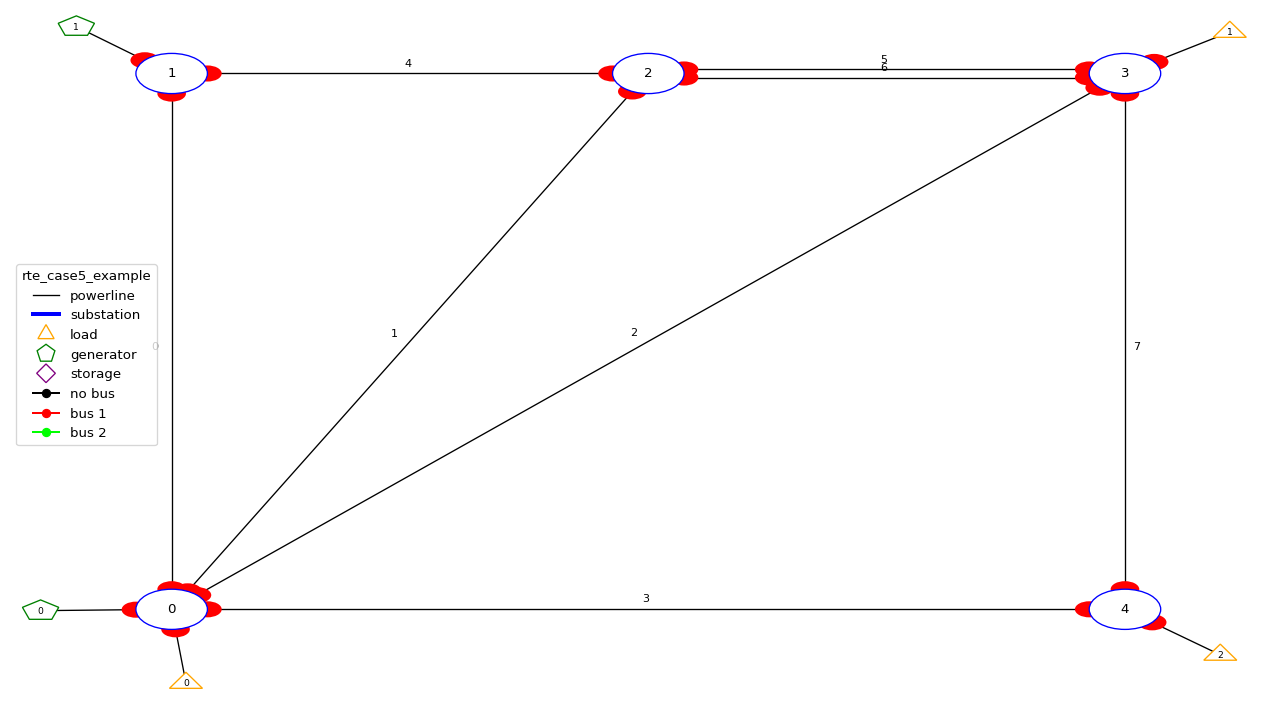

In [3]:
plot_helper = PlotMatplot(env.observation_space)

obs = env.reset()
fig = plot_helper.plot_info(line_values=[int(el) for el in np.arange(env.n_line)])

In [4]:
# Load ids
print("\nInjection information:")
load_to_subid = env.action_space.load_to_subid
print ('There are {} loads connected to substations with id: {}'.format(len(load_to_subid), load_to_subid))

# Generators irds
gen_to_subid = env.action_space.gen_to_subid
print ('There are {} generators, connected to substations with id: {}'.format(len(gen_to_subid), gen_to_subid))

# Line id sender
print("\nPowerline information:")
line_or_to_subid = env.action_space.line_or_to_subid
line_ex_to_subid = env.action_space.line_ex_to_subid
print ('There are {} transmissions lines on this grid. They connect:'.format(len(line_or_to_subid)))
for line_id, (ori, ext) in enumerate(zip(line_or_to_subid, line_ex_to_subid)):
    print("Line with id {} connects: substation origin id {} to substation extremity id {}".format(line_id, ori, ext))

# Num of elements per SE
print("\nSubstations information:")
for i, nb_el in enumerate(env.action_space.sub_info):
    print("On susbtation {} there are {} elements.".format(i, nb_el))


Injection information:
There are 3 loads connected to substations with id: [0 3 4]
There are 2 generators, connected to substations with id: [0 1]

Powerline information:
There are 8 transmissions lines on this grid. They connect:
Line with id 0 connects: substation origin id 0 to substation extremity id 1
Line with id 1 connects: substation origin id 0 to substation extremity id 2
Line with id 2 connects: substation origin id 0 to substation extremity id 3
Line with id 3 connects: substation origin id 0 to substation extremity id 4
Line with id 4 connects: substation origin id 1 to substation extremity id 2
Line with id 5 connects: substation origin id 2 to substation extremity id 3
Line with id 6 connects: substation origin id 2 to substation extremity id 3
Line with id 7 connects: substation origin id 3 to substation extremity id 4

Substations information:
On susbtation 0 there are 6 elements.
On susbtation 1 there are 3 elements.
On susbtation 2 there are 4 elements.
On susbtatio

In [5]:
action_space = env.action_space
observation_space = env.observation_space

# Create do_nothing action.
agent_action = action_space({}) # this is the do nothing action

In [6]:
action_space

In [7]:
# Run one step in the environment
obs, *_ = env.step(agent_action)
print(type(obs))

<class 'grid2op.Space.GridObjects.CompleteObservation_rte_case5_example'>


In [8]:
obs_as_vect = obs.to_vect() 
print(len(obs_as_vect))
print(obs_as_vect)

182
[ 2.0190000e+03  1.0000000e+00  6.0000000e+00  0.0000000e+00
  5.0000000e+00  6.0000000e+00  8.9999998e-01  2.6591259e+01
  1.5807407e+02 -1.5994029e+02  1.0200000e+02  1.0200000e+02
  8.8999996e+00  7.9000001e+00  7.5000000e+00  6.1999998e+00
  5.5000000e+00  5.3000002e+00  1.0200000e+02  1.0189334e+02
  1.0184712e+02 -9.5859013e+00 -2.3974745e+00  1.3034806e-01
  3.8530281e+00  1.5381992e+01  5.9145169e+00  5.9145169e+00
  3.7838449e+00  7.9156853e+01  3.5693317e+01  2.0958063e+01
  1.6065828e+01 -7.8247765e+01 -1.9132811e+01 -1.9132811e+01
 -1.6228142e+01  1.0200000e+02  1.0200000e+02  1.0200000e+02
  1.0200000e+02  1.0200000e+02  1.0193751e+02  1.0193751e+02
  1.0189334e+02  4.5132471e+02  2.0249002e+02  1.1863116e+02
  9.3516037e+01  4.5138226e+02  1.1342333e+02  1.1342333e+02
  9.4418724e+01  1.1209268e+01  2.7813275e+00  5.2444514e-02
 -3.7743020e+00 -1.4610361e+01 -5.8681450e+00 -5.8681450e+00
 -3.7256980e+00 -8.1692528e+01 -3.8709965e+01 -2.4808470e+01
 -1.8797091e+01  7.6

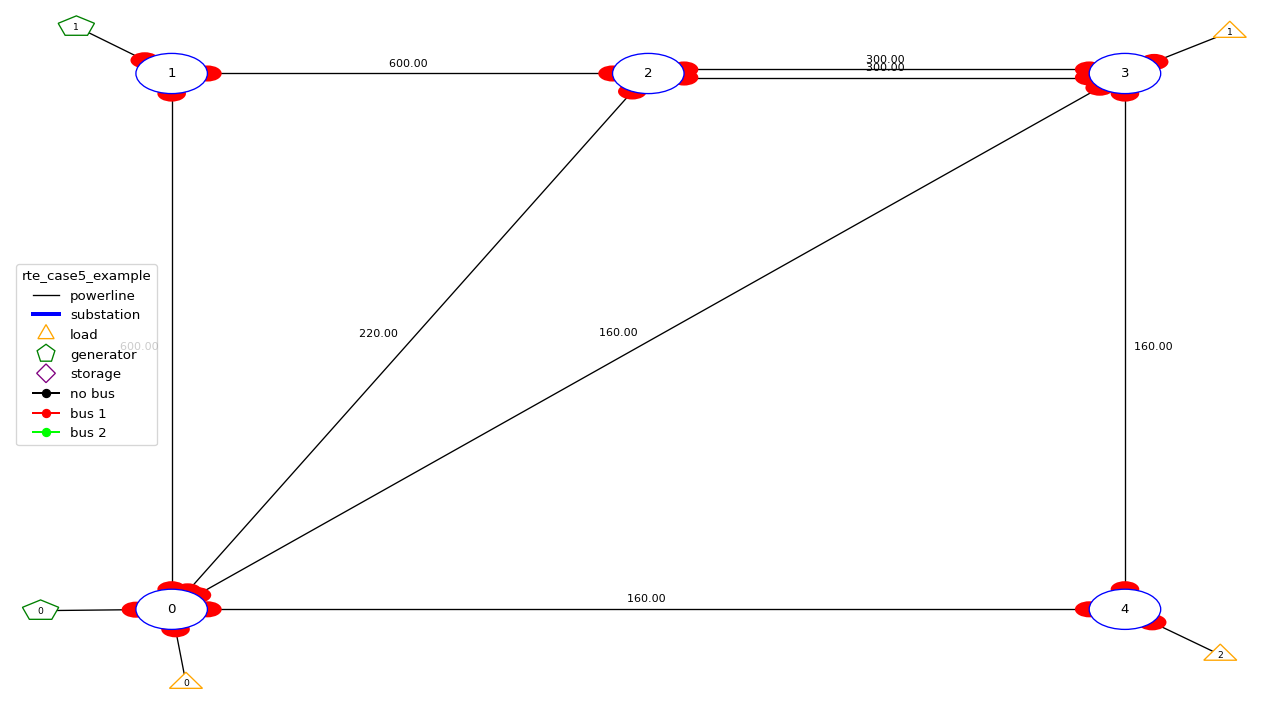

In [9]:
_ = plot_helper.plot_info(line_values=env._thermal_limit_a)

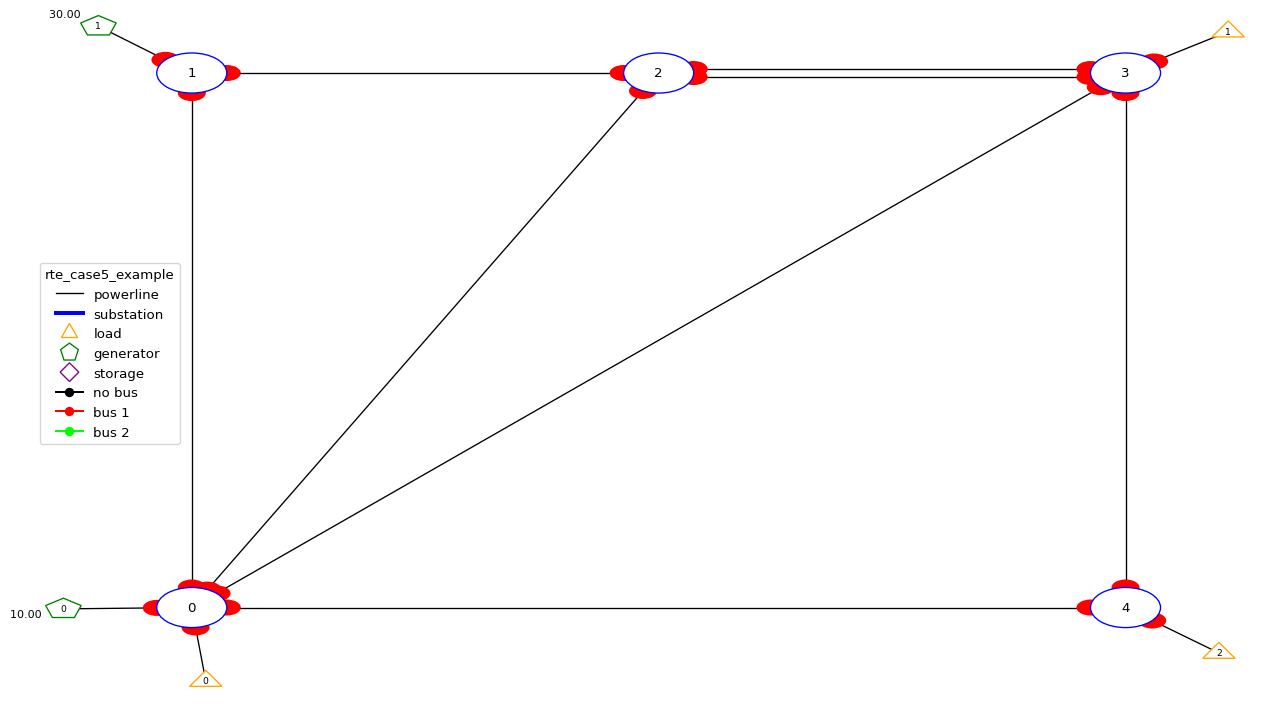

In [10]:
_ = plot_helper.plot_info(gen_values=env.gen_pmax)

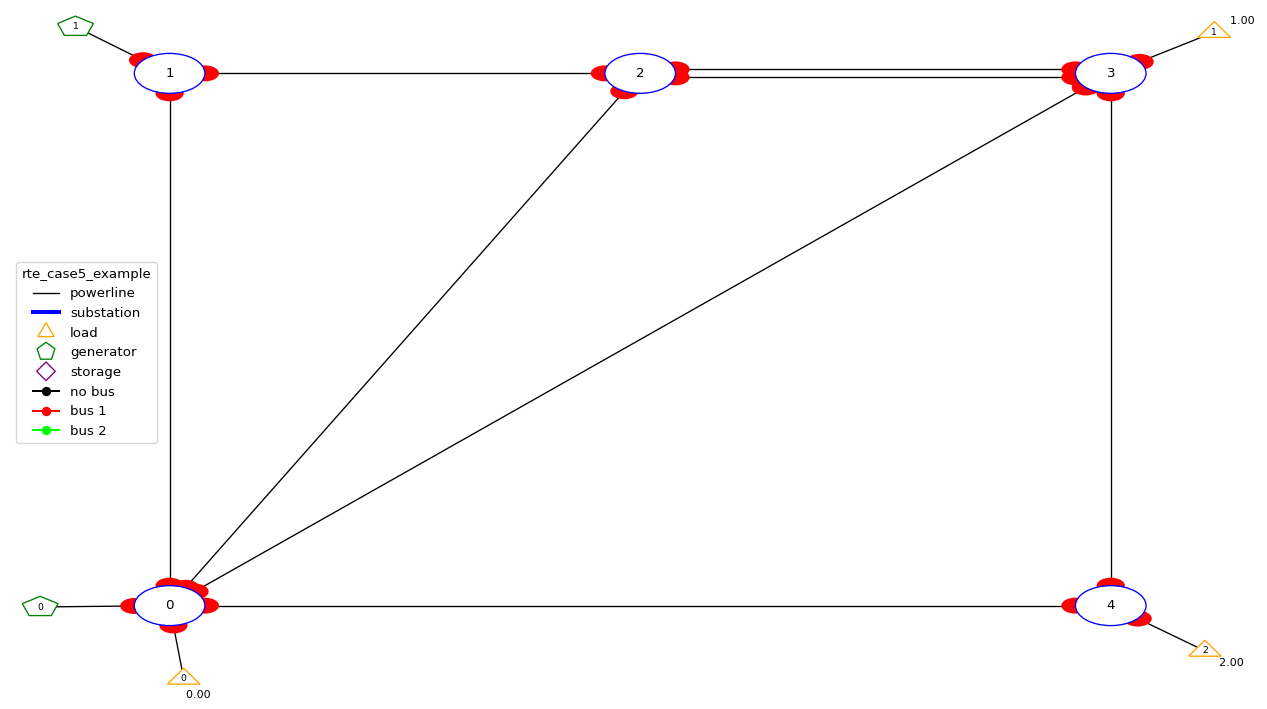

In [11]:
_ = plot_helper.plot_info(load_values=[el for el in range(env.n_load)])